In [78]:
# import xarray as xr, numpy as np, pandas as pd, glob, os, re
import regionmask, geopandas as gpd, cartopy, matplotlib.pyplot as plt

xn,xx,yn,yx = [-105,-93,16,28]
mapproj = cartopy.crs.PlateCarree()

sf = gpd.read_file("sf_mx-gulfcoast")

# Gridded linear trends

In [9]:
gmst = pd.read_table("ts-obs/gmst.txt", comment = "#", sep = " +", engine = "python", header = None, names = ["year","gmst"], index_col = "year").to_xarray().gmst

## ERA5

In [ ]:
da = xr.open_dataset("data/era5_tp.nc").tp.sel(lon = slice(360+xn,360+xx), lat = slice(yx,yn))
rm = regionmask.defined_regions.natural_earth_v5_1_2.land_50.mask(da)

### JJASO

In [67]:
jjaso = da.sel(time = da.time.dt.month.isin([6,7,8,9,10])).resample(time = "YS").sum()
jjaso = jjaso.where(rm == 0)
jjaso = jjaso.assign_coords(time = jjaso.time.dt.year)

In [68]:
# fit linear trend over time
jjaso_pre1979 = jjaso.sel(time = slice(None, "1979")).polyfit("time", deg = 1).polyfit_coefficients
jjaso_post1979 = jjaso.sel(time = slice("1979", None)).polyfit("time", deg = 1).polyfit_coefficients
jjaso_all = jjaso.polyfit("time", deg = 1).polyfit_coefficients

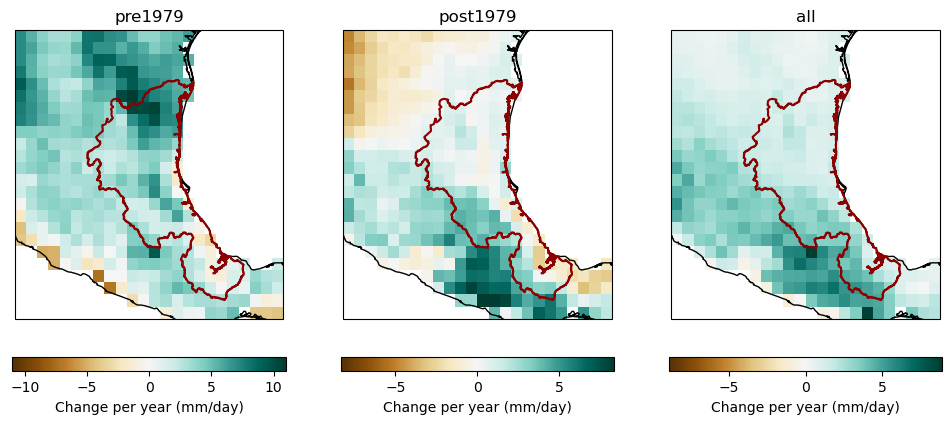

In [90]:
ctype = "abs"
fig, axs = plt.subplots(ncols = 3, figsize = (12,5), subplot_kw = {"projection" : mapproj})

for i in range(3):
    ax = axs[i]
    period = ["pre1979", "post1979", "all"][i]
    coeffs = eval("jjaso_"+period)

    if ctype == "abs":
        coeffs = coeffs.sel(degree = 1)
        vrange = {"vmin" : -10, "vmax" : 10}
        vlabel = "Change per year (mm/day)"
        
    coeffs.plot(ax = ax, cmap = "BrBG", cbar_kwargs = { "location" : "bottom", "pad" : 0.1 } | { "label" : vlabel })
    ax.set_title(period)
    ax.coastlines()
    sf.boundary.plot(ax = ax, color = "darkred")

In [ ]:
# fit GMST trend over time
gmst_era5 = gmst.sel(year = jjaso.time)

In [101]:
jjaso_pre1979 = jjaso.sel(time = slice(None, "1979")).assign_coords(time = gmst_era5.sel(time = slice(None, "1979")).values).polyfit("time", deg = 1).polyfit_coefficients
jjaso_post1979 = jjaso.sel(time = slice("1979", None)).assign_coords(time = gmst_era5.sel(time = slice("1979", None)).values).polyfit("time", deg = 1).polyfit_coefficients
jjaso_all = jjaso.polyfit("time", deg = 1).polyfit_coefficients

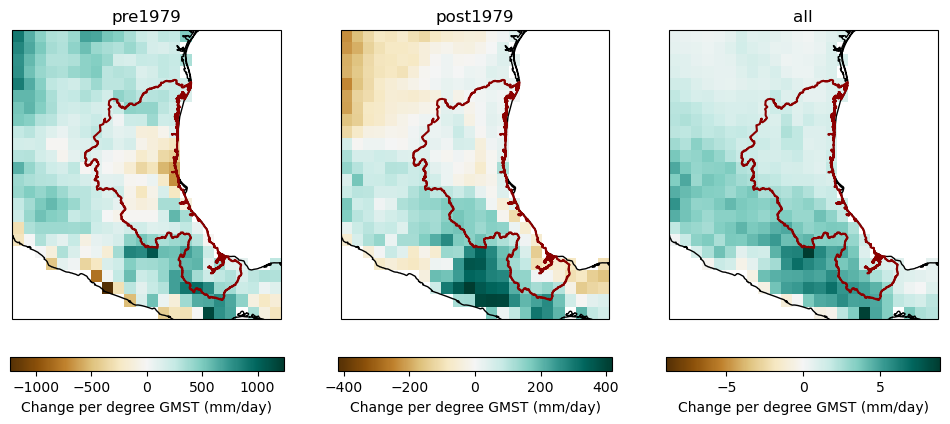

In [105]:
ctype = "abs"
fig, axs = plt.subplots(ncols = 3, figsize = (12,5), subplot_kw = {"projection" : mapproj})

for i in range(3):
    ax = axs[i]
    period = ["pre1979", "post1979", "all"][i]
    coeffs = eval("jjaso_"+period)

    if ctype == "abs":
        coeffs = coeffs.sel(degree = 1)
        vrange = {"vmin" : -10, "vmax" : 10}
        vlabel = "Change per degree GMST (mm/day)"
        
    coeffs.plot(ax = ax, cmap = "BrBG", cbar_kwargs = { "location" : "bottom", "pad" : 0.1 } | { "label" : vlabel })
    ax.set_title(period)
    ax.coastlines()
    sf.boundary.plot(ax = ax, color = "darkred")

### Rx3day

In [ ]:
rx3day = da.rolling(time = 3).sum().sel(time = da.time.dt.month.isin([6,7,8,9,10])).resample(time = "YS").max()

In [106]:
# fit linear trend over time
rx3day_pre1979 = rx3day.sel(time = slice(None, "1979")).polyfit("time", deg = 1).polyfit_coefficients
rx3day_post1979 = rx3day.sel(time = slice("1979", None)).polyfit("time", deg = 1).polyfit_coefficients
rx3day_all = rx3day.polyfit("time", deg = 1).polyfit_coefficients

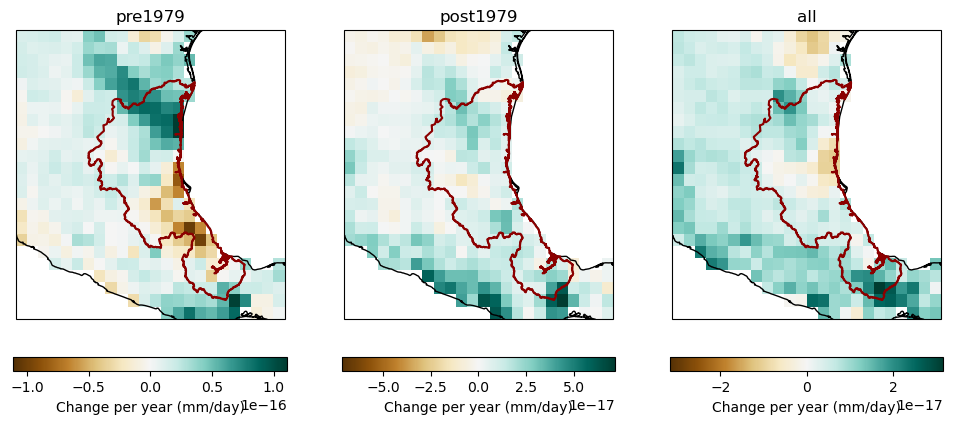

In [107]:
ctype = "abs"
fig, axs = plt.subplots(ncols = 3, figsize = (12,5), subplot_kw = {"projection" : mapproj})

for i in range(3):
    ax = axs[i]
    period = ["pre1979", "post1979", "all"][i]
    coeffs = eval("rx3day_"+period)

    if ctype == "abs":
        coeffs = coeffs.sel(degree = 1)
        vrange = {"vmin" : -10, "vmax" : 10}
        vlabel = "Change per year (mm/day)"
        
    coeffs.plot(ax = ax, cmap = "BrBG", cbar_kwargs = { "location" : "bottom", "pad" : 0.1 } | { "label" : vlabel })
    ax.set_title(period)
    ax.coastlines()
    sf.boundary.plot(ax = ax, color = "darkred")

In [ ]:
# fit GMST trend over time
gmst_era5 = gmst.sel(year = rx3day.time)

In [101]:
rx3day_pre1979 = rx3day.sel(time = slice(None, "1979")).assign_coords(time = gmst_era5.sel(time = slice(None, "1979")).values).polyfit("time", deg = 1).polyfit_coefficients
rx3day_post1979 = rx3day.sel(time = slice("1979", None)).assign_coords(time = gmst_era5.sel(time = slice("1979", None)).values).polyfit("time", deg = 1).polyfit_coefficients
rx3day_all = rx3day.polyfit("time", deg = 1).polyfit_coefficients

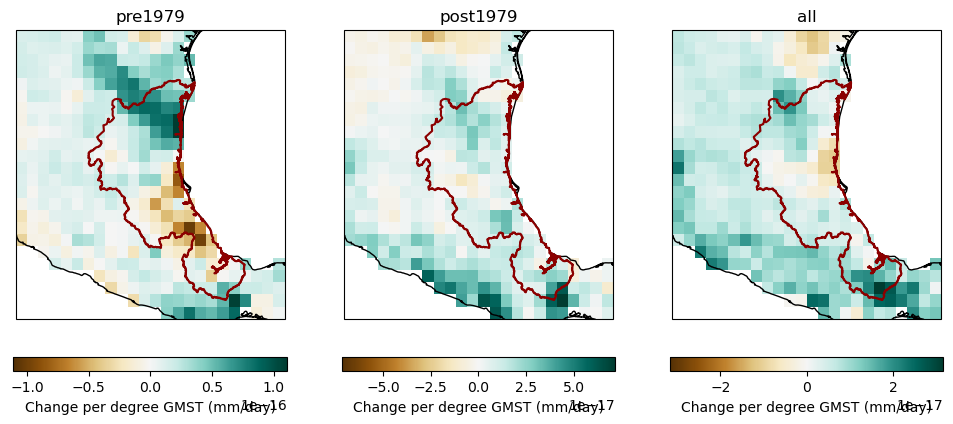

In [108]:
ctype = "abs"
fig, axs = plt.subplots(ncols = 3, figsize = (12,5), subplot_kw = {"projection" : mapproj})

for i in range(3):
    ax = axs[i]
    period = ["pre1979", "post1979", "all"][i]
    coeffs = eval("rx3day_"+period)

    if ctype == "abs":
        coeffs = coeffs.sel(degree = 1)
        vrange = {"vmin" : -10, "vmax" : 10}
        vlabel = "Change per degree GMST (mm/day)"
        
    coeffs.plot(ax = ax, cmap = "BrBG", cbar_kwargs = { "location" : "bottom", "pad" : 0.1 } | { "label" : vlabel })
    ax.set_title(period)
    ax.coastlines()
    sf.boundary.plot(ax = ax, color = "darkred")

## MxHighResClimDB

In [126]:
jjaso = xr.open_dataset("data/pr-jjaso_MxHighResClimDB.nc").sel(lon = slice(xn,xx), lat = slice(yx,yn)).pr
jjaso = jjaso.assign_coords(time = jjaso.time.dt.year)


rm = regionmask.mask_geopandas(sf, jjaso)
jjaso = jjaso.where(rm == 0)

In [127]:
# fit linear trend over time
jjaso_pre1979 = jjaso.sel(time = slice(None, "1979")).polyfit("time", deg = 1).polyfit_coefficients
jjaso_post1979 = jjaso.sel(time = slice("1979", None)).polyfit("time", deg = 1).polyfit_coefficients
jjaso_all = jjaso.polyfit("time", deg = 1).polyfit_coefficients

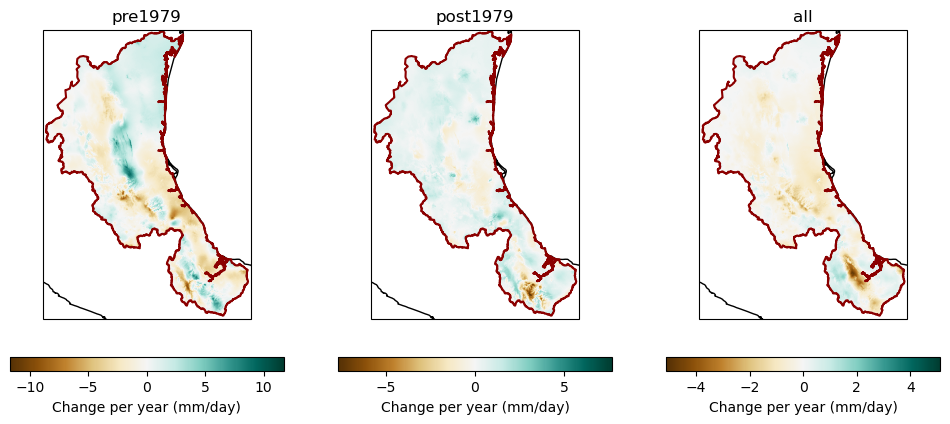

In [128]:
ctype = "abs"
fig, axs = plt.subplots(ncols = 3, figsize = (12,5), subplot_kw = {"projection" : mapproj})

for i in range(3):
    ax = axs[i]
    period = ["pre1979", "post1979", "all"][i]
    coeffs = eval("jjaso_"+period)

    if ctype == "abs":
        coeffs = coeffs.sel(degree = 1)
        vrange = {} #{"vmin" : -10, "vmax" : 10}
        vlabel = "Change per year (mm/day)"
        
    coeffs.plot(ax = ax, cmap = "BrBG", **vrange, cbar_kwargs = { "location" : "bottom", "pad" : 0.1 } | { "label" : vlabel })
    ax.set_title(period)
    ax.coastlines()
    sf.boundary.plot(ax = ax, color = "darkred")

In [129]:
# fit GMST trend over time
gmst_era5 = gmst.sel(year = jjaso.time)

In [130]:
jjaso_pre1979 = jjaso.sel(time = slice(None, "1979")).assign_coords(time = gmst_era5.sel(time = slice(None, "1979")).values).polyfit("time", deg = 1).polyfit_coefficients
jjaso_post1979 = jjaso.sel(time = slice("1979", None)).assign_coords(time = gmst_era5.sel(time = slice("1979", None)).values).polyfit("time", deg = 1).polyfit_coefficients
jjaso_all = jjaso.polyfit("time", deg = 1).polyfit_coefficients

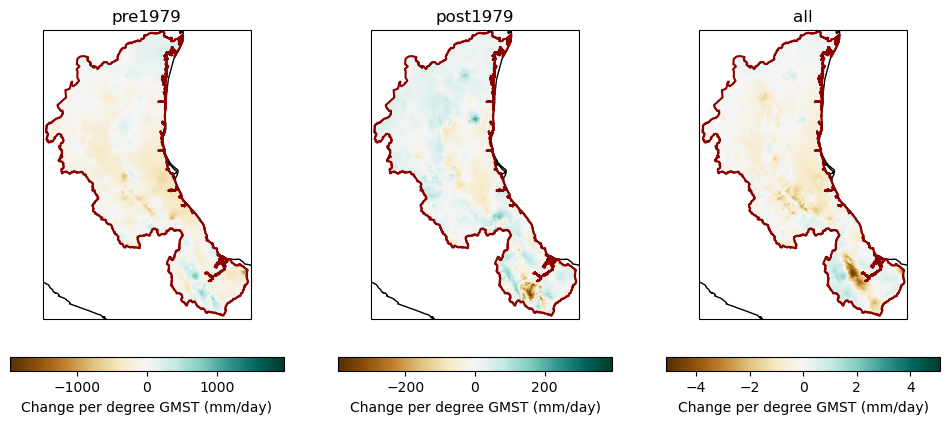

In [132]:
ctype = "abs"
fig, axs = plt.subplots(ncols = 3, figsize = (12,5), subplot_kw = {"projection" : mapproj})

for i in range(3):
    ax = axs[i]
    period = ["pre1979", "post1979", "all"][i]
    coeffs = eval("jjaso_"+period)

    if ctype == "abs":
        coeffs = coeffs.sel(degree = 1)
        vrange = {}#{"vmin" : -100, "vmax" : 100}
        vlabel = "Change per degree GMST (mm/day)"
        
    coeffs.plot(ax = ax, cmap = "BrBG", **vrange, cbar_kwargs = { "location" : "bottom", "pad" : 0.1 } | { "label" : vlabel })
    ax.set_title(period)
    ax.coastlines()
    sf.boundary.plot(ax = ax, color = "darkred")